In [ ]:
#!pip3 install wordcloud
#!pip3 install nltk

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords


#nltk.download('popular')

In [88]:
file_path = os.path.join(os.getcwd(), "training.1600000.processed.noemoticon.csv")

df = pd.read_csv(file_path)
df = df[['target', 'text']]
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [89]:
# 정규표현식을 사용하여 텍스트 전처리 함수 정의
def clean_text(text):
    # URL 제거
    text = re.sub(r"http\S+", "", text)
    # 사용자 언급 제거 (@로 시작하는 단어)
    text = re.sub(r"@\w+", "", text)
    # 특수 문자 제거
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # 다중 공백을 단일 공백으로 치환
    text = re.sub(r"\s+", " ", text).strip()
    # "Im" 단어 제거
    text = re.sub(r"\bIm\b", "", text)
    # "get" 단어 제거
    text = re.sub(r"\bget\b", "", text)
    # 전체 텍스트를 소문자로 변환
    text = text.lower()
    return text


# 전처리된 텍스트를 새로운 컬럼에 저장
df["cleaned_text"] = df["text"].apply(clean_text)


start_negative_idx = 0
end_negative_idx = 800000
start_positive_idx = 800001
end_positive_idx = 1600000
df_negative = df.iloc[start_negative_idx:end_negative_idx]
df_positive = df.iloc[start_positive_idx:end_positive_idx]

In [ ]:
df_negative["tokenized_text"] = df_negative["cleaned_text"].apply(word_tokenize)
df_positive["tokenized_text"] = df_positive["cleaned_text"].apply(word_tokenize)

In [91]:
def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word.lower() not in stop_word_list]


stop_word_list = stopwords.words("english")
df_negative["tokenized_text"] = df_negative["tokenized_text"].apply(remove_stopwords)
df_positive["tokenized_text"] = df_positive["tokenized_text"].apply(remove_stopwords)

print(df_negative)
print(df_positive)

/var/folders/14/2vn0vwzj29zb97jgpbhnrr_00000gn/T/ipykernel_37542/1342934276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative["tokenized_text"] = df_negative["tokenized_text"].apply(remove_stopwords)


        target                                               text  \
0            0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1            0  is upset that he can't update his Facebook by ...   
2            0  @Kenichan I dived many times for the ball. Man...   
3            0    my whole body feels itchy and like its on fire    
4            0  @nationwideclass no, it's not behaving at all....   
...        ...                                                ...   
799995       0  Sick  Spending my day laying in bed listening ...   
799996       0                                    Gmail is down?    
799997       0                      rest in peace Farrah! So sad    
799998       0  @Eric_Urbane Sounds like a rival is flagging y...   
799999       0  has to resit exams over summer...  wishes he w...   

                                             cleaned_text  \
0       awww thats a bummer you shoulda got david carr...   
1       is upset that he cant update his facebook

/var/folders/14/2vn0vwzj29zb97jgpbhnrr_00000gn/T/ipykernel_37542/1342934276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["tokenized_text"] = df_positive["tokenized_text"].apply(remove_stopwords)


In [92]:
# tokenized_text 열을 펼치기
df_negative = df_negative.explode('tokenized_text')
df_positive = df_positive.explode('tokenized_text')


# 각 단어의 빈도를 세기
df_negative = df_negative['tokenized_text'].value_counts().reset_index()
df_positive = df_positive['tokenized_text'].value_counts().reset_index()


# DataFrame의 열 이름 지정
df_negative.columns = ['word', 'count']
df_positive.columns = ['word', 'count']


print(df_negative[:10])
print(df_positive[:10])

    word  count
0     go  45164
1   dont  45158
2   work  44044
3   cant  43766
4     im  40743
5   like  40665
6    day  39482
7    got  38209
8  today  36209
9  going  33450
     word  count
0    good  60869
1    love  46856
2     day  45336
3    like  37116
4  thanks  33750
5     lol  33511
6     got  31627
7   going  30650
8       u  30353
9    time  29348


In [93]:
negative = df_negative.set_index('word').to_dict()['count']
positive = df_positive.set_index('word').to_dict()['count']

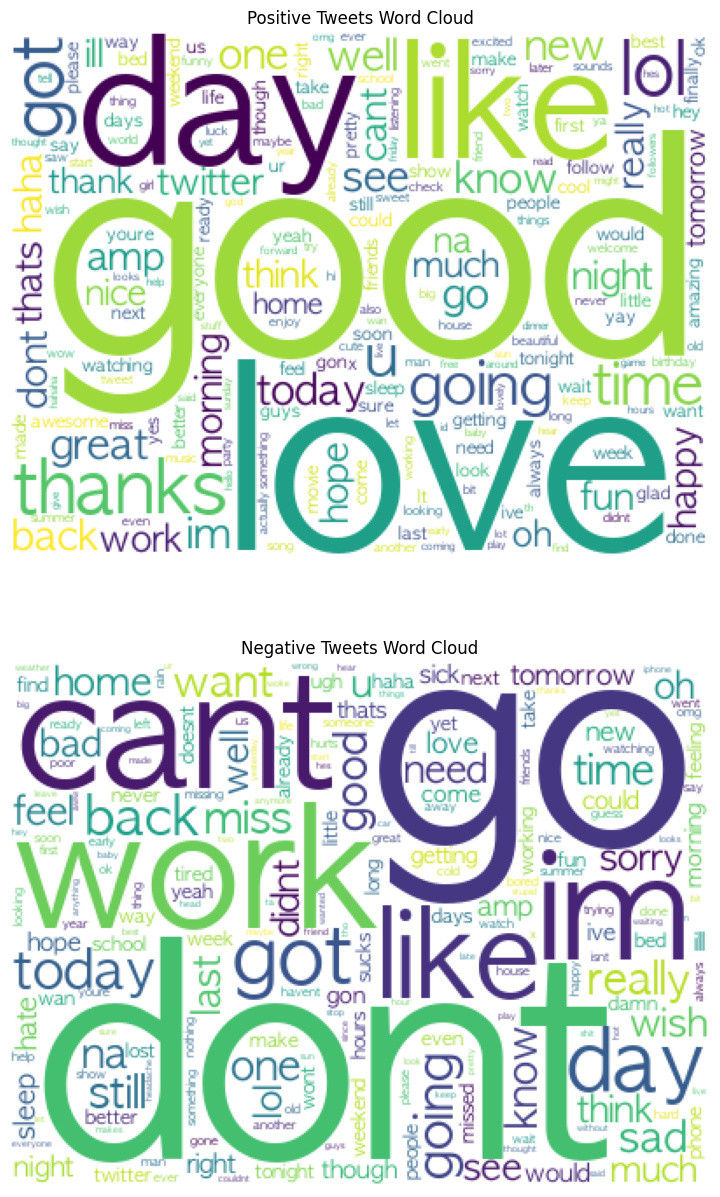

In [94]:
# 긍정적인 워드클라우드 설정 및 생성
wc_positive = WordCloud(
    random_state=123,
    font_path="AppleGothic",
    width=400,
    height=300,
    background_color="white",
    max_words=200
)
img_wordcloud_positive = wc_positive.generate_from_frequencies(positive)

# 부정적인 워드클라우드 설정 및 생성
wc_negative = WordCloud(
    random_state=123,
    font_path="AppleGothic",
    width=400,
    height=300,
    background_color="white",
    max_words=200
)
img_wordcloud_negative = wc_negative.generate_from_frequencies(negative)

# 서브플롯을 이용해 워드클라우드 표시
plt.figure(figsize=(15, 15))  # 전체 플롯 크기 지정

# 첫 번째 서브플롯 - 긍정적인 워드클라우드
plt.subplot(2, 1, 1)
plt.title('Positive Tweets Word Cloud')
plt.axis('off')  # 축 없애기
plt.imshow(img_wordcloud_positive)

# 두 번째 서브플롯 - 부정적인 워드클라우드
plt.subplot(2, 1, 2)
plt.title('Negative Tweets Word Cloud')
plt.axis('off')  # 축 없애기
plt.imshow(img_wordcloud_negative)

plt.show()